<a href="https://colab.research.google.com/github/KevDes22/Personality-Analysis-The-Introvert-Vs-Extrovert-Edition/blob/main/Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "personality_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rakeshkapilavai/extrovert-vs-introvert-behavior-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1-1171450531.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


In [ ]:
print("First 5 records:", df.tail())

First 5 records:       Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
2895               3.0         No                      7.0            6.0   
2896               3.0         No                      8.0            3.0   
2897               4.0        Yes                      1.0            1.0   
2898              11.0        Yes                      1.0            NaN   
2899               3.0         No                      6.0            6.0   

     Drained_after_socializing  Friends_circle_size  Post_frequency  \
2895                        No                  6.0             6.0   
2896                        No                 14.0             9.0   
2897                       Yes                  4.0             0.0   
2898                       Yes                  2.0             0.0   
2899                        No                  6.0             9.0   

     Personality  
2895   Extrovert  
2896   Extrovert  
2897   Introvert  
2898   Introvert 

In [ ]:
# checking the data set information and shape before data cleaning
print("Defined columns in the personality dataset\n", df.info())

print("\nShape of the dataset \t" , df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
Defined columns in the personality dataset
 None

Shape of the dataset 	 (2900, 8)


In [ ]:
# Data Cleaning
# 1. deleting duplicate value in our data set and showing the current shape
df_no_duplicate = df.drop_duplicates()
print(df_no_duplicate.shape)

(2512, 8)


In [ ]:
# 2. checking columns with missing values and counting the missing values in each column
print("display column with missing value\n" , df.isnull().any())
print("\ndisplay number of column with missing value \n" , df.isnull().sum())

display column with missing value
 Time_spent_Alone              True
Stage_fear                    True
Social_event_attendance       True
Going_outside                 True
Drained_after_socializing     True
Friends_circle_size           True
Post_frequency                True
Personality                  False
dtype: bool

display number of column with missing value 
 Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [ ]:
# Data cleaning
# dropping of missing values and checking the shape of data set after missing values are deleted
df_rows_dropped_any = df.dropna()
print(df_rows_dropped_any.shape)

(2477, 8)


In [ ]:
# checking the dataset if there is missing value after deleting them
print("display column with missing value\n" , df_rows_dropped_any.isnull().any())
print("\ndisplay the shape of the data\n", df_rows_dropped_any.shape)

display column with missing value
 Time_spent_Alone             False
Stage_fear                   False
Social_event_attendance      False
Going_outside                False
Drained_after_socializing    False
Friends_circle_size          False
Post_frequency               False
Personality                  False
dtype: bool

display the shape of the data
 (2477, 8)


In [ ]:
print("Descriptive Statistics for Numerical Columns:")
display(df_rows_dropped_any.describe())

# For categorical columns (if any), we can get value counts
# In this dataset, all columns appear to be numerical based on the .info() output,
# but if there were object or category dtypes, you could use:
for col in df_rows_dropped_any.select_dtypes(include=['object', 'category']).columns:
    print(f"\nValue Counts for column '{col}':")
    display(df_rows_dropped_any[col].value_counts())

Descriptive Statistics for Numerical Columns:


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,3.939039,3.013726,6.239806,3.559548
std,3.491162,2.900044,2.257239,4.311365,2.927397
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000



Value Counts for column 'Stage_fear':


,count
Stage_fear,
No,1241
Yes,1236



Value Counts for column 'Drained_after_socializing':


,count
Drained_after_socializing,
No,1241
Yes,1236



Value Counts for column 'Personality':


,count
Personality,
Extrovert,1274
Introvert,1203


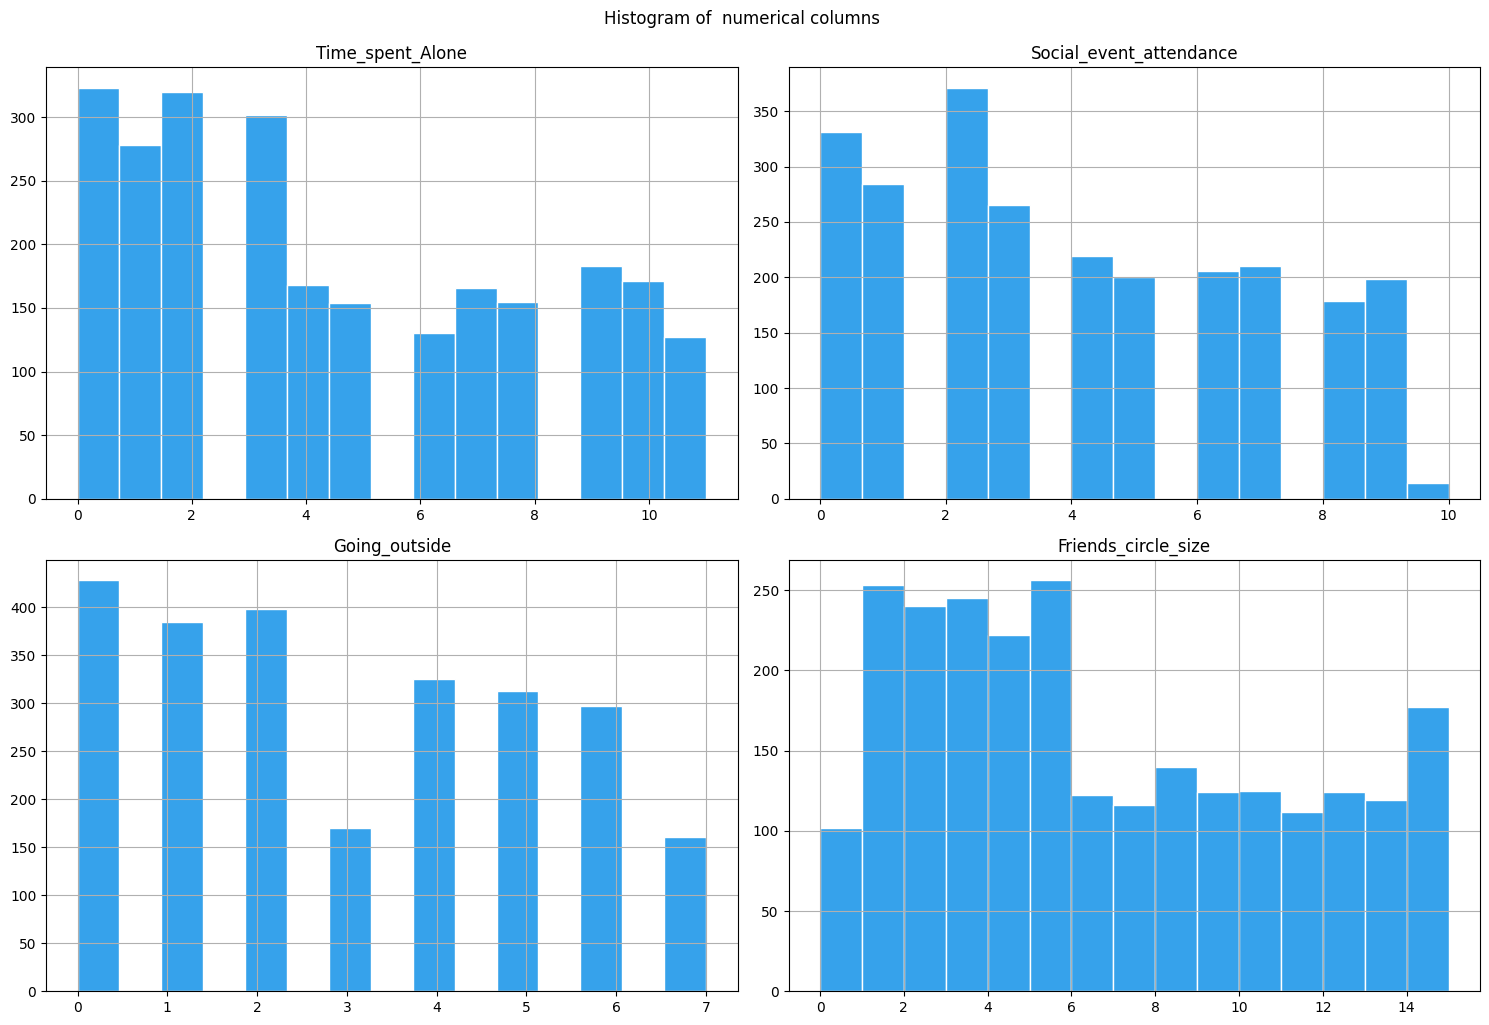

In [ ]:
# visualizing the numerial columns using histograms
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size']

df_rows_dropped_any[columns].hist(bins=15, figsize=(15, 10), edgecolor='white', color='#36A2EB')
plt.tight_layout()

plt.suptitle("Histogram of  numerical columns ", y=1.02)
plt.show()

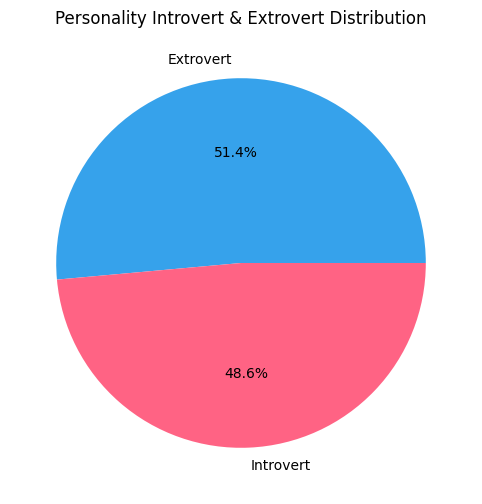

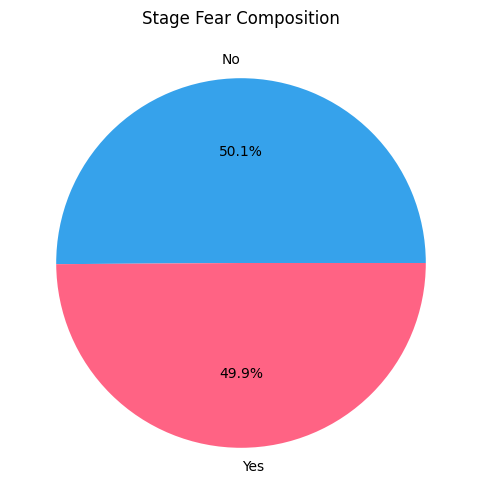

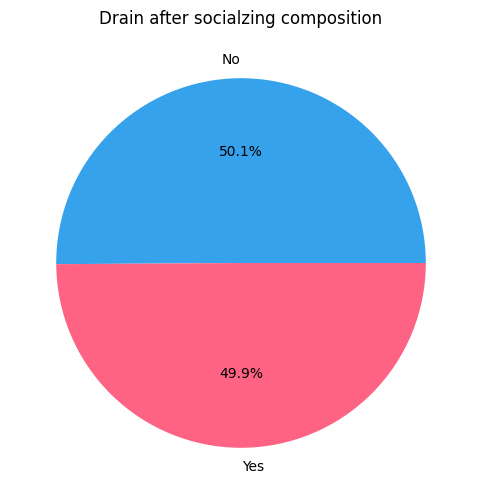

In [ ]:
# visualizing the proportion of non numerical colums
# personality
personality_count = df_rows_dropped_any['Personality'].value_counts()

plt.figure(figsize=(8, 6))
personality_count.plot(kind='pie', autopct = '%1.1f%%', colors=['#36A2EB', '#FF6384'] )
plt.title('Personality Introvert & Extrovert Distribution')
plt.ylabel('')
plt.show()


# stage fear
Stage_count = df_rows_dropped_any['Stage_fear'].value_counts()

plt.figure(figsize=(8, 6))
Stage_count.plot(kind='pie', autopct = '%1.1f%%',  colors=['#36A2EB', '#FF6384'])
plt.title('Stage Fear Composition')
plt.ylabel('')
plt.show()

# drained after socializing
drain_count = df_rows_dropped_any['Drained_after_socializing'].value_counts()

plt.figure(figsize=(8, 6))
drain_count.plot(kind='pie', autopct = '%1.1f%%',  colors=['#36A2EB', '#FF6384'])
plt.title('Drain after socialzing composition')
plt.ylabel('')
plt.show()

/tmp/ipython-input-11-2596492386.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  extrovert = df_rows_dropped_any[df['Personality'] == 'Extrovert']
/tmp/ipython-input-11-2596492386.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  introvert = df_rows_dropped_any[df['Personality'] == 'Introvert']


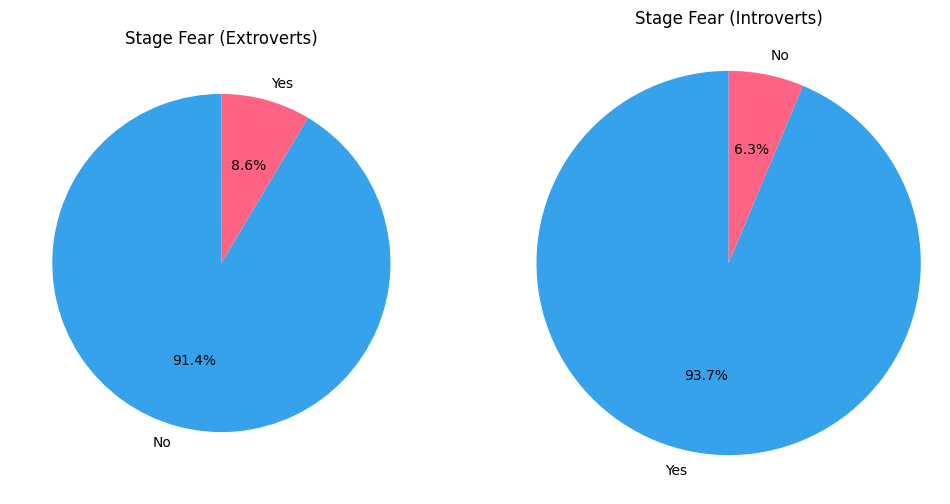

In [ ]:
# visualizing stage fear and drain after socilizing  in both personality
import matplotlib.pyplot as plt



# Filter for each personality type
extrovert = df_rows_dropped_any[df['Personality'] == 'Extrovert']
introvert = df_rows_dropped_any[df['Personality'] == 'Introvert']

# Count Stage_fear for each group
extrovert_stage = extrovert['Stage_fear'].value_counts()
introvert_stage = introvert['Stage_fear'].value_counts()

# subplots for pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(extrovert_stage, labels=extrovert_stage.index, autopct='%1.1f%%', startangle=90, colors=['#36A2EB', '#FF6384'])
ax1.set_title('Stage Fear (Extroverts)')
ax2.pie(introvert_stage, labels=introvert_stage.index, autopct='%1.1f%%', startangle=90, colors=['#36A2EB', '#FF6384'])
ax2.set_title('Stage Fear (Introverts)')
plt.axis('equal')
plt.show()

<Figure size 700x700 with 0 Axes>

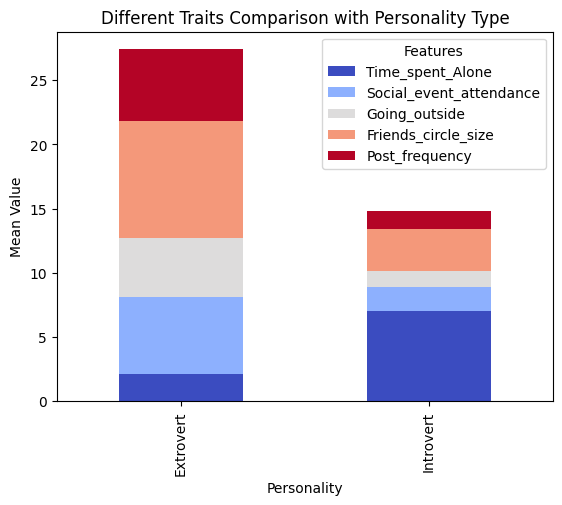

In [ ]:
#  Stacked Bar Chart for Mean of Numerical Columns by Personality
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


plt.figure(figsize=(7, 7))
grouped_data = df_rows_dropped_any.groupby('Personality')[numerical_cols].mean()
grouped_data.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Different Traits Comparison with Personality Type')
plt.xlabel('Personality')
plt.ylabel('Mean Value')
plt.legend(title='Features')
plt.show()

/tmp/ipython-input-18-1666334699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y='Time_spent_Alone', data=df, palette=['#36A2EB', '#FF6384'])


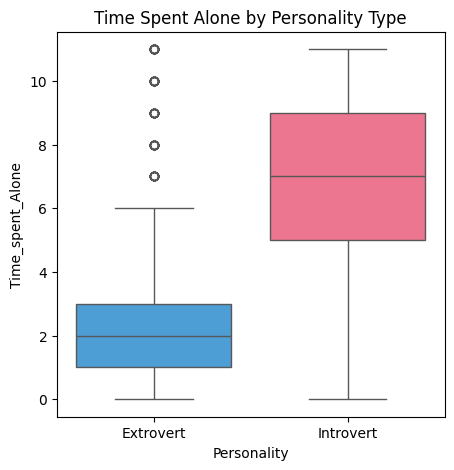

In [ ]:
#box plot for time spent alone by Personality

import seaborn as sns
import matplotlib.pyplot as plt


# Box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Personality', y='Time_spent_Alone', data=df, palette=['#36A2EB', '#FF6384'])
plt.title('Time Spent Alone by Personality Type')
plt.show()

/tmp/ipython-input-23-626397224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y='Going_outside', data=df, palette=['#36A2EB', '#FF6384'])


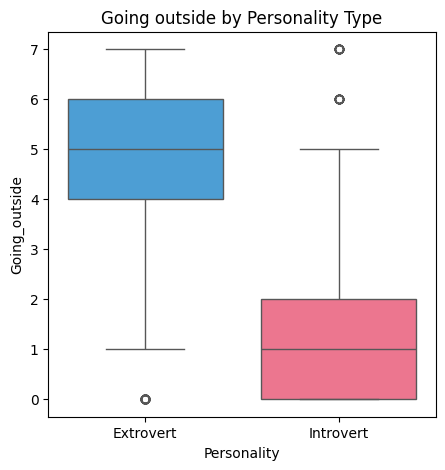

In [ ]:
# box plot for going outside by personality type
import seaborn as sns
import matplotlib.pyplot as plt


# Box plot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Personality', y='Going_outside', data=df, palette=['#36A2EB', '#FF6384'])
plt.title('Going outside by Personality Type')
plt.show()

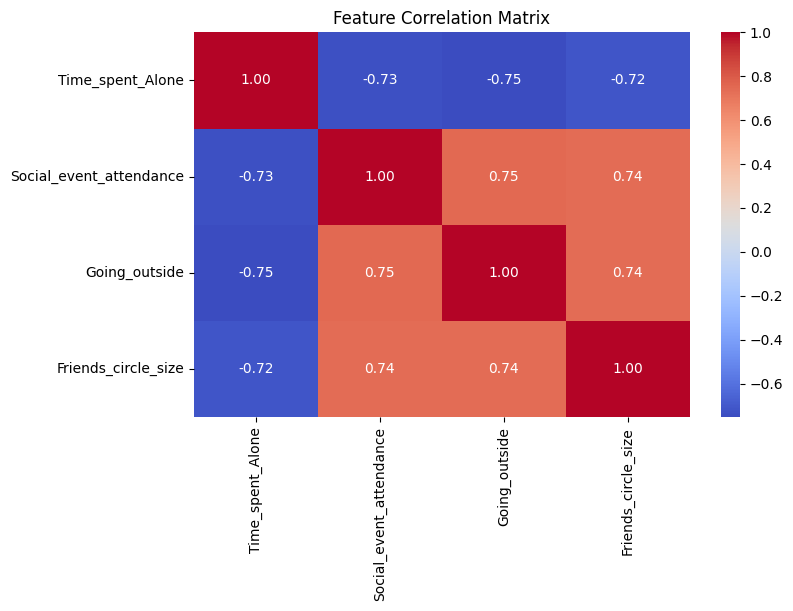

In [ ]:
# pairwise correlation between all numerial colums
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size']
plt.figure(figsize=(8,5))
corr = df_rows_dropped_any[correlation_matrix].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()